# 1.Data Cleaning and Preparation:
## 1.a
* There are 4 datasets I pick: 2 mandatory, ACCIDENT, VINDECODE, and the other two are: VIOLATN and PERSON.
* Since I downloaded and picked files. I use excel to go over all the datasets to have a an overview the structure of each dataset. 
* I use excel top pick columns that fit my design and drop unnecessary column.
* Since the dataset is huge because it contain all the accidents from all over the USA. Therefore, I would like to pick two state : Texas and California. The reasons: these two states has large population, and Texas is where I live.
* The following pic is the map:
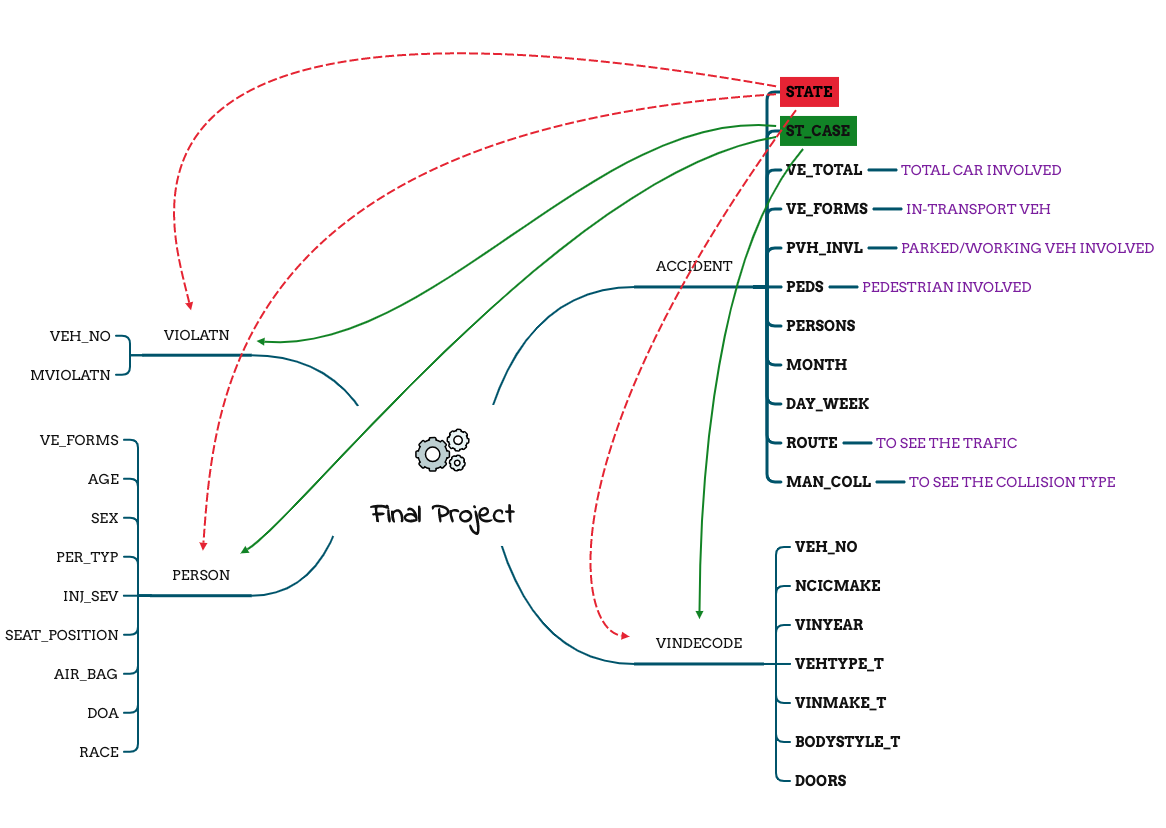
* As you can see in the map, I want to investigate the relationship:
 - Age Group that might cause fatal accident.
 - And further prediction to be determined.

In [48]:
#LOADING LIBRARY NEEDED:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os
import os.path
import scipy.stats as stats
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
import pydot
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
pwd

'/Users/lannguyen/Desktop/Fall 2020/DataScience/f20-ds-hw-dinhlan86/Final Project'

In [3]:
#READING FILES
accident = pd.read_csv("../Final Project/ACCIDENT.csv")
vindecode = pd.read_excel("../Final Project/VINDECODE.xlsx")
violation = pd.read_excel("../Final Project/VIOLATN.xlsx")
person = pd.read_excel("../Final Project/PERSON.xls")

In [4]:
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10218 entries, 0 to 10217
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE     10218 non-null  object
 1   ST_CASE   10218 non-null  int64 
 2   VE_FORMS  10218 non-null  int64 
 3   VEH_NO    10218 non-null  int64 
 4   AGE       10218 non-null  int64 
 5   SEX       10218 non-null  object
 6   PER_TYP   10218 non-null  object
 7   INJ_SEV   10218 non-null  int64 
 8   AIR_BAG   10218 non-null  int64 
 9   DOA       10218 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 798.4+ KB


In [5]:
person.isna().any()

STATE       False
ST_CASE     False
VE_FORMS    False
VEH_NO      False
AGE         False
SEX         False
PER_TYP     False
INJ_SEV     False
AIR_BAG     False
DOA         False
dtype: bool

In [6]:
vindecode.isna().any()

STATE         False
ST_CASE       False
VEH_NO        False
NCICMAKE       True
VINYEAR        True
VEHTYPE_T      True
VINMAKE_T      True
BODYSTYL_T     True
DOORS          True
dtype: bool

In [7]:
vindecode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10577 entries, 0 to 10576
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATE       10577 non-null  object 
 1   ST_CASE     10577 non-null  int64  
 2   VEH_NO      10577 non-null  int64  
 3   NCICMAKE    10087 non-null  object 
 4   VINYEAR     10087 non-null  float64
 5   VEHTYPE_T   10087 non-null  object 
 6   VINMAKE_T   10087 non-null  object 
 7   BODYSTYL_T  10087 non-null  object 
 8   DOORS       10087 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 743.8+ KB


In [8]:
vindecode = vindecode.drop(['NCICMAKE','BODYSTYL_T','DOORS','VINMAKE_T','VINYEAR'],axis=1)

In [9]:
vindecode

,STATE,ST_CASE,VEH_NO,VEHTYPE_T
0,California,60001,1,Truck
1,California,60002,1,Truck
2,California,60002,2,Truck
3,California,60003,1,Passenger Car
4,California,60003,2,Truck
...,...,...,...,...
10572,Texas,483391,2,Truck
10573,Texas,483392,1,Passenger Car
10574,Texas,483392,2,Truck
10575,Texas,483393,1,NaN


In [10]:
violation.isna().any()

VEH_NO      False
MVIOLATN    False
dtype: bool

## 1.b/ Since I want to forcus on the Range of Age that could affect the driving behavior, I decided to as following:

### CREATE AGE RANGE FOR PERSON.AGE
- I RELABEL SOME VARIABLES FEATURES IN NUMBER, SUCH AS GENDER. BECAUSE THESE DATASET ARE RELATIONAL TO EACH OTHER. ALSO, AS I EXAMINATE MY DATASETS BASE ON ST_CASE, FOR EXAMPLE IN SOME IF GENDER IS NOT IDENTIFIED, THE OTHER FEATURES RELATE TO THAT WILL BE IDENTIFY AS UNKNOWN OR UNCLEARD. THUS, WHEN I CLEAN EACH DATASET WITH EXEL, I LABEL THOSE DATASET AS UNKNOWN. MY STRATEGY IS WHEN I JOIN NECESSARY DATASET, I WILL FILTER MY DATSET WITT A COLUMN'S VALUES !="UNKNOW", THUS MY DATASET WILL BE CLEANER AS A WHOLE ( ELIMINATE SOME OUTLINER AS WELL).

- SINCE THE AGE VARIES, CUTTING AGE IN GROUP WILL HAVE HELPS EXPLORE THE TREND OF DATA BETTER I DECIDE TO CUT AGE INTO  7 GROUPS:
 * SINCE 15 IS THE AGE THAT IS ELIGIBLE FOR DRIVER LICENSE.
 * FROM THOSE GROUP WITH RANGE FROM 15-65, THESE GROUP OF AGE  ASSUME THAT PEOPLE LEGALLY HAVE DRIVER LISENCE AND COMMUTE FREQUENTLY BY VEHICLE
 * 65 => PEOPLE RETIRED AND ASSUME THAT THEY DRIVE LESS OR NONE. 
 
*** FOR THOSE VALUE UNDER AGE SUCH AS 998,999. THOSE VALUES OCCUPY REPRESENT A PORTION OF DATASET, I WOULD LIKE TO BREAK INTO 3 EQUAL PORTION AND ASSIGN NUMBER THAT FIT INTO 3 PORPULAR RANGE FROM 19-24,25-39,40-59. SINCE THOSE GROUPS REPRESENT A LARGE PORTION OF THE DATASET PERSON.

In [11]:
person=person.dropna(how='any')

person["AGE_GROUP"]=pd.cut(person["AGE"],bins=[0,18,24,39,59,74,99],labels=['0-18','19-24','25-39','40-59','60-74','75+'])



In [12]:
person

,STATE,ST_CASE,VE_FORMS,VEH_NO,AGE,SEX,PER_TYP,INJ_SEV,AIR_BAG,DOA,AGE_GROUP
0,California,60001,1,1,74,0,Driver,4,1,1,60-74
1,California,60002,2,1,39,1,Driver,4,0,1,25-39
2,California,60002,2,2,62,0,Driver,3,1,0,60-74
3,California,60003,2,1,40,1,Driver,4,1,0,40-59
4,California,60003,2,2,61,1,Driver,3,1,0,60-74
...,...,...,...,...,...,...,...,...,...,...,...
10213,Texas,483391,2,2,31,1,Driver,0,0,0,25-39
10214,Texas,483392,2,1,88,1,Driver,4,1,0,75+
10215,Texas,483392,2,2,51,1,Driver,1,0,0,40-59
10216,Texas,483393,1,1,45,Unknown,Driver,9,0,0,40-59


In [13]:
accident

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,MONTH,DAY_WEEK,ROUTE,MAN_COLL,DRUNK_DR,FATALS
0,California,60001,1,1,0,0,January,Sunday,3,0,0,2
1,California,60002,2,2,0,0,January,Thrusday,3,2,0,2
2,California,60003,2,2,0,0,January,Thrusday,9,6,0,1
3,California,60005,3,3,0,0,January,Saturday,1,1,1,1
4,California,60006,1,1,0,0,January,Tuesday,9,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6559,Texas,483390,1,1,0,1,December,Wednesday,8,0,0,1
6560,Texas,483391,2,2,0,0,November,Tuesday,2,1,1,1
6561,Texas,483392,2,2,0,0,September,Thrusday,7,6,0,1
6562,Texas,483393,1,1,0,1,October,Wednesday,6,0,0,1


In [14]:
violation

,VEH_NO,MVIOLATN
0,1,0
1,1,0
2,2,0
3,1,0
4,2,0
...,...,...
10558,2,0
10559,1,0
10560,2,0
10561,1,0


In [15]:
vindecode.isna().any()

STATE        False
ST_CASE      False
VEH_NO       False
VEHTYPE_T     True
dtype: bool

# 3. DATA ENGINEERING:

## 3.a/
 - THE REASON I WANT TO FILTER THE DATASET PERSON BY "DRIVER" VALUE BECAUSE I WANT TO INVESTIGATE INFLUENCE FACTOR THAT COULD CAUSE ACCIDENT SUCH AS: AGE, GENDER, VIOLATION, VEHICLE TYPE. ALSO, IT WOULD HELP ME EASILY JOIN 3 THREE FILES BY VEH_NO
 
 - JOIN VINDECODE WITH VIOLATION BASE ON VEH_NO SO WE CAN IDENTIFY THE VIOLATION OF EACH VEHICLE INVOLED IN ACCIDENT THEN JOIN PERSON WITH THAT NEW DATAFRAME USING INNERJOIN. AS THE PERSON DATASET IS FILTERED BY DRIVER THEREFORES, THE NEW DATASET WILL HAVE ALL DRIVERS THAT INVOVLED IN EACH ACCIDENT CASE. 
 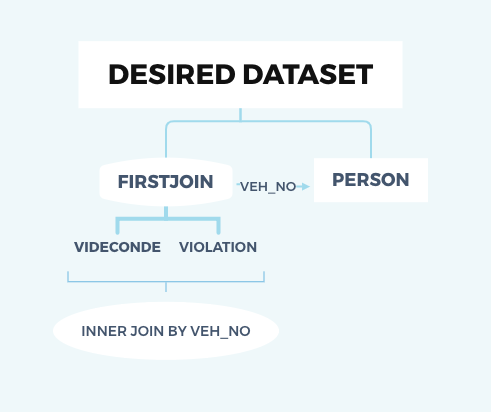
- ALSO, SINCE I CREATED AGE_GROUPS TO IDENTIFY RISKY GROUPS MAY CAUSE FATAL ACCIDENT. WE ALSO NEED TO LABELS THOSE GROUP INTO NUMERICAL VARIABLE  BECAUSE RANDOM FOREST ONLY RUN WITH NUMERICAL VALUE ONLY FOR FEATURES. THEREFORE, I WILL DIVIDE AGE_GROUPS INTO EACH COLUMN AS THE CODE IN THE QUESTION 4.

## 3.b/ 
- THE REASON I WANT TO DIVIDE AGE INTO GROUPS INSTEAD OF USING AGE AS CONINOUS VARIABLE. BECAUSE I BELIEVE THAT EACH GROUPS HAS DIFFERENT BEHAVIOR THAT MAY CAUSE ACCIDENT.
- FOR EXAMPLE: A INSURANCE COMPANY WILL DECIDE THE PREMIUM BASE ON EACH GROUPS. IF YOU ARE UNDER 20 OR GREATER THAN 60 THE PREMIUM FEE WILL HAVE HIGH PREMIUM FEE.


In [16]:
#INNER JOIN VINDECODE AND VIOLATION ON THE VEH_NO
firstjoin = vindecode.merge(violation, left_index=True, right_index=True,
                 how='inner', suffixes=('', '_y'))
firstjoin.drop(firstjoin.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

In [17]:
firstjoin


,STATE,ST_CASE,VEH_NO,VEHTYPE_T,MVIOLATN
0,California,60001,1,Truck,0
1,California,60002,1,Truck,0
2,California,60002,2,Truck,0
3,California,60003,1,Passenger Car,0
4,California,60003,2,Truck,0
...,...,...,...,...,...
10558,Texas,483383,1,NaN,0
10559,Texas,483384,1,NaN,0
10560,Texas,483384,2,Motorcycle,0
10561,Texas,483384,3,Motorcycle,0


In [18]:
firstjoin.VEH_NO.value_counts()
#IT MAKE SENSE BECAUSE THIS JOIN ELIMINATE ANY ROW WITH VEH_NO=0. BECAUSE WE ONLY TAKE INTO ACCOUNT DRIVERS.

1     6555
2     2994
3      665
4      198
5       86
6       30
7       14
8       11
9        6
10       3
11       1
Name: VEH_NO, dtype: int64

In [19]:
firstjoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10563 entries, 0 to 10562
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   STATE      10563 non-null  object
 1   ST_CASE    10563 non-null  int64 
 2   VEH_NO     10563 non-null  int64 
 3   VEHTYPE_T  10075 non-null  object
 4   MVIOLATN   10563 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 495.1+ KB


In [20]:
###INNER JOIN THE FIRSTJOIN WITH PERSON
secondjoin= firstjoin.merge(person, left_index=True, right_index=True,
                 how='inner', suffixes=('', '_y'))
secondjoin.drop(secondjoin.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

In [21]:
secondjoin

,STATE,ST_CASE,VEH_NO,VEHTYPE_T,MVIOLATN,VE_FORMS,AGE,SEX,PER_TYP,INJ_SEV,AIR_BAG,DOA,AGE_GROUP
0,California,60001,1,Truck,0,1,74,0,Driver,4,1,1,60-74
1,California,60002,1,Truck,0,2,39,1,Driver,4,0,1,25-39
2,California,60002,2,Truck,0,2,62,0,Driver,3,1,0,60-74
3,California,60003,1,Passenger Car,0,2,40,1,Driver,4,1,0,40-59
4,California,60003,2,Truck,0,2,61,1,Driver,3,1,0,60-74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,Texas,483170,2,Passenger Car,0,2,31,1,Driver,0,0,0,25-39
10214,Texas,483170,3,Truck,0,2,88,1,Driver,4,1,0,75+
10215,Texas,483171,1,Passenger Car,0,2,51,1,Driver,1,0,0,40-59
10216,Texas,483172,1,Truck,0,1,45,Unknown,Driver,9,0,0,40-59


In [22]:
### CLEAR UNKNOWN DATA FROM COLUMNS SEX 
filteredjoin=secondjoin[secondjoin.SEX !='Unknown']
filteredjoin

,STATE,ST_CASE,VEH_NO,VEHTYPE_T,MVIOLATN,VE_FORMS,AGE,SEX,PER_TYP,INJ_SEV,AIR_BAG,DOA,AGE_GROUP
0,California,60001,1,Truck,0,1,74,0,Driver,4,1,1,60-74
1,California,60002,1,Truck,0,2,39,1,Driver,4,0,1,25-39
2,California,60002,2,Truck,0,2,62,0,Driver,3,1,0,60-74
3,California,60003,1,Passenger Car,0,2,40,1,Driver,4,1,0,40-59
4,California,60003,2,Truck,0,2,61,1,Driver,3,1,0,60-74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10211,Texas,483169,1,Truck,0,1,33,0,Driver,0,0,0,25-39
10212,Texas,483170,1,Truck,0,2,37,1,Driver,2,0,0,25-39
10213,Texas,483170,2,Passenger Car,0,2,31,1,Driver,0,0,0,25-39
10214,Texas,483170,3,Truck,0,2,88,1,Driver,4,1,0,75+


In [23]:
filteredjoin.isna().any()

STATE        False
ST_CASE      False
VEH_NO       False
VEHTYPE_T     True
MVIOLATN     False
VE_FORMS     False
AGE          False
SEX          False
PER_TYP      False
INJ_SEV      False
AIR_BAG      False
DOA          False
AGE_GROUP     True
dtype: bool

# 2. DESCRIPTIVE STATISTIC

## DECRIBE DATA SET & GRAPHS & EXPLAINATION:


In [24]:
filteredjoin.describe()

,ST_CASE,VEH_NO,MVIOLATN,VE_FORMS,AGE,INJ_SEV,AIR_BAG,DOA
count,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000
mean,268772.141672,1.535418,0.125683,1.958308,41.346286,2.346286,0.422384,0.271099
std,209955.397338,0.889509,0.331509,1.089220,17.365450,1.966654,0.493964,0.444550
min,60001.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,61625.000000,1.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000
50%,63258.500000,1.000000,0.000000,2.000000,38.000000,3.000000,0.000000,0.000000
75%,481559.000000,2.000000,0.000000,2.000000,54.000000,4.000000,1.000000,1.000000
max,483171.000000,11.000000,1.000000,10.000000,98.000000,9.000000,1.000000,1.000000


AS WE CAN SEE THAT THE FROM THE AGE 14 - 39, DRIVER LIKELY GOT INTO CAR ACCIDENT
HOWEVER WITH REALLY LIGHT ON INURY. HOWEVER, SINCE THE AGE 39 AND UP to 60 and above, IT'S LIKE LY INVOLVE MORE CARS IN ACCIDENTS
WITH SEVERE OR DEADLY INURY. 


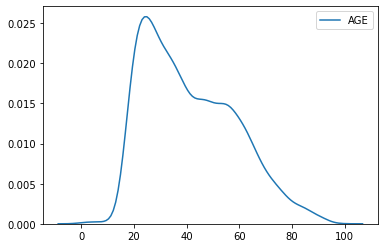

In [25]:
sns.kdeplot(filteredjoin.AGE)

AS THE KDEPLOT SHOWS US THAT MOSTLY DRIVER ARE FROM THE AGE OF 16-70 BASE ON THE DENSITY. 
THERE ARE SMALL DISTRIBUTION UNDER 20 AND FROM 80-100. THERE ARE STILL DRIVER WITH AGE MORE THAN 80 BUT IT IS STILL SMALL DISTRIBUTION.

{'whiskers': [<matplotlib.lines.Line2D at 0x1268a62e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1268a69a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12689af40>],
 'medians': [<matplotlib.lines.Line2D at 0x1268b00a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1268b03a0>],
 'means': []}

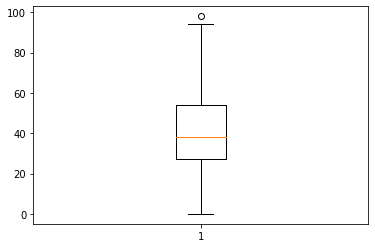

In [26]:
plt.boxplot(filteredjoin.AGE)

##I USE BOXPLOT TO SPOT THE OUTLINER.
- AS WE CAN SEE THAT THE THE MAJORITY OF DRIVERS CAUSED ACCIDENT ARE THE AGE RANGE FROM 20-60 ARE ALMOST 70% OF DATASET. 

- THE DATASET SHOW THAT THE NUMBER OF DRIVER UNDER 0-14, MAY CAUSE ACCIDENT(UNDER 6 CASES IN 2 STATES, ACCORDING TO THE DATASET), BUT IT'S A VERY SMALL PORTION, WE COULD THINK THAT MAYBE WRONG INPUT DATA, OR MAYBE KIDS DROVE CAR WITHOUT PARENTAL SUPERVISION, OR KIDS PLAYED WITH CAR AND STARTED THE CARD AND CAUSED ACCIDENT.
- ALSO, IN THE DATASET THERE ARE SOME VALUESUCH AS 998, 999 IN AGE FEATURES, INSTEAD OF DROPPING THOSE DATA, I DECIDE TO DIVIDE IT 4 PART EQUALLY AS IN EACH GROUP OF AGE FROM 19-60 

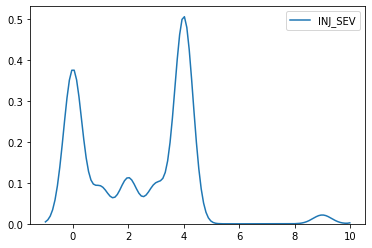

In [27]:
sns.kdeplot(filteredjoin.INJ_SEV)

- AS THE GRAPH SHOWS US THE HIGHT DISTRIBUTION HOW SEVERE THE INURY RANGE FROM MINOR INURY TO DEATH AS LEVEL 2 TO 5.
- COMPARED WITH FROM NO FATALITY TO MINOR INJURY, FATALITY SEEMS HAVE LARGER POPULATION. 
- 6 REPRESENTS AS "DIE PRIOR CRASH", I CAN INTEPRETE THAT MAYBE DRIVER SUFFER SOME ILLNESS CAUSE HIS/HER DEATH AND LOST CONTROL AND CRASH INTO OTHER. HOWEVER, THE DISTRIBUTION IS AS SMALL AS O. THERE ARE SOME REPORT FROM LEVEL 8-10 HOWEVER, IT IS NOT A LARGE MAJORITY AS WELL. 

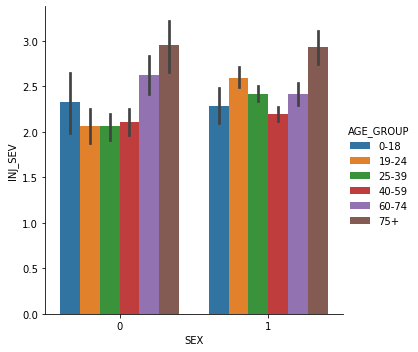

In [28]:
sns.catplot(x="SEX",y="INJ_SEV",hue="AGE_GROUP",data=filteredjoin,kind="bar")

**DRIVING BEHAVIOR: IN TERM OF GENDER AND AGE.

- AS WE CAN SEE MALE DRIVER ARE MORE AGRESSIVE THAN FEMALE DRIVER SINCE THEY ARE LIKE CAUSE MORE SEVERE INURY THAN WOMAN. THUS, A LOT OF PEOPLE SAY WOMAN CAN'T DRIVE IS EXAGGERATED.

- ALSO WE CAN SEE THAT IN BOTH GENDER ARE LIKELY CAUSE MORE SEVERR INJURY IN THE AGE UNDER 18 AND THE AGE FROM 60 AND ABOVE ARE VERY RISKY DRIVERS.

In [29]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6564 entries, 0 to 6563
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE     6564 non-null   object
 1   ST_CASE   6564 non-null   int64 
 2   VE_TOTAL  6564 non-null   int64 
 3   VE_FORMS  6564 non-null   int64 
 4   PVH_INVL  6564 non-null   int64 
 5   PEDS      6564 non-null   int64 
 6   MONTH     6564 non-null   object
 7   DAY_WEEK  6564 non-null   object
 8   ROUTE     6564 non-null   int64 
 9   MAN_COLL  6564 non-null   int64 
 10  DRUNK_DR  6564 non-null   int64 
 11  FATALS    6564 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 615.5+ KB


In [30]:
accidet=accident.astype({"MONTH":'category',"DAY_WEEK":'category'})
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6564 entries, 0 to 6563
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE     6564 non-null   object
 1   ST_CASE   6564 non-null   int64 
 2   VE_TOTAL  6564 non-null   int64 
 3   VE_FORMS  6564 non-null   int64 
 4   PVH_INVL  6564 non-null   int64 
 5   PEDS      6564 non-null   int64 
 6   MONTH     6564 non-null   object
 7   DAY_WEEK  6564 non-null   object
 8   ROUTE     6564 non-null   int64 
 9   MAN_COLL  6564 non-null   int64 
 10  DRUNK_DR  6564 non-null   int64 
 11  FATALS    6564 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 615.5+ KB


In [31]:
df= pd.DataFrame(accident,columns=['DAY_WEEK','FATALS'])

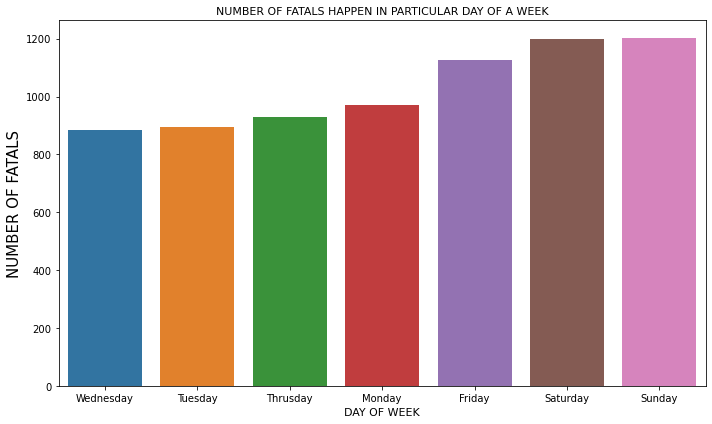

In [32]:
df = df.groupby(["DAY_WEEK"]).FATALS.sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="DAY_WEEK", y="FATALS", data=df,order = df.sort_values('FATALS').DAY_WEEK)
plt.xlabel("DAY OF WEEK", size=11)
plt.ylabel("NUMBER OF FATALS", size=15)
plt.title("NUMBER OF FATALS HAPPEN IN PARTICULAR DAY OF A WEEK", size=11)
plt.tight_layout()
## IT SEEMS THAT THE NUMBER OF FATALS HAPPENS MORE ON WEEKEND


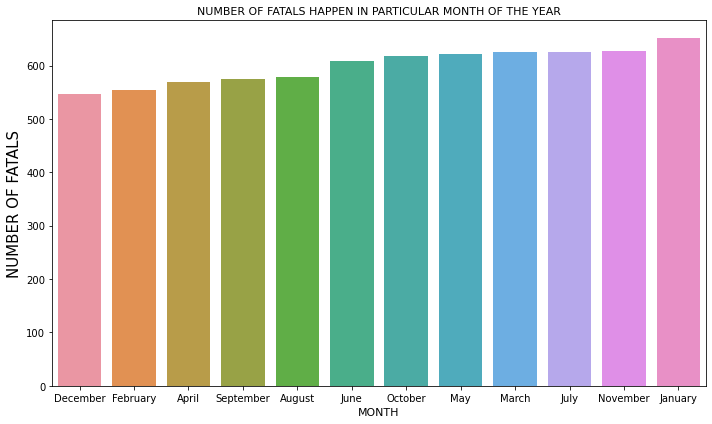

In [33]:
df1= pd.DataFrame(accident,columns=['MONTH','FATALS'])
df1
df1 = df1.groupby(["MONTH"]).FATALS.sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="MONTH", y="FATALS", data=df1,order = df1.sort_values('FATALS').MONTH)
plt.xlabel("MONTH", size=11)
plt.ylabel("NUMBER OF FATALS", size=15)
plt.title("NUMBER OF FATALS HAPPEN IN PARTICULAR MONTH OF THE YEAR", size=11)
plt.tight_layout()
## FROM NOVEMBER TO JANUARY, THE TOTAL OF CASE ARE HIGHER,
##IT WOULD BE HOLIDAY MONTHS, PEOPLE TENDS TO DRIVE OUT FOR SHOPPING AND VISIT FRIENDS AND PROBALY DRINKING TOO

# 4/ BUILDING MODEL:
## RANDOM FOREST MODEL-SUPERVISED
I WANT TO INVESTIGATE INFLUENT FACTORS THAT COULD CAUSE THE RESULT IN DEADLY CRASH (CAUSING DEAD AT SCENSE OR ON THE WAY TO HOSPITAL).

In [34]:
filteredjoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9882 entries, 0 to 10215
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   STATE      9882 non-null   object  
 1   ST_CASE    9882 non-null   int64   
 2   VEH_NO     9882 non-null   int64   
 3   VEHTYPE_T  9425 non-null   object  
 4   MVIOLATN   9882 non-null   int64   
 5   VE_FORMS   9882 non-null   int64   
 6   AGE        9882 non-null   int64   
 7   SEX        9882 non-null   object  
 8   PER_TYP    9882 non-null   object  
 9   INJ_SEV    9882 non-null   int64   
 10  AIR_BAG    9882 non-null   int64   
 11  DOA        9882 non-null   int64   
 12  AGE_GROUP  9881 non-null   category
dtypes: category(1), int64(8), object(4)
memory usage: 1.3+ MB


In [35]:
filteredjoin=filteredjoin.drop(['STATE','ST_CASE','VE_FORMS','VEH_NO','PER_TYP','AGE'],axis=1)

In [36]:
newdata=pd.get_dummies(filteredjoin,columns=['AGE_GROUP','VEHTYPE_T'])
newdata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9882 entries, 0 to 10215
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   MVIOLATN                 9882 non-null   int64 
 1   SEX                      9882 non-null   object
 2   INJ_SEV                  9882 non-null   int64 
 3   AIR_BAG                  9882 non-null   int64 
 4   DOA                      9882 non-null   int64 
 5   AGE_GROUP_0-18           9882 non-null   uint8 
 6   AGE_GROUP_19-24          9882 non-null   uint8 
 7   AGE_GROUP_25-39          9882 non-null   uint8 
 8   AGE_GROUP_40-59          9882 non-null   uint8 
 9   AGE_GROUP_60-74          9882 non-null   uint8 
 10  AGE_GROUP_75+            9882 non-null   uint8 
 11  VEHTYPE_T_Motorcycle     9882 non-null   uint8 
 12  VEHTYPE_T_Passenger Car  9882 non-null   uint8 
 13  VEHTYPE_T_Truck          9882 non-null   uint8 
dtypes: int64(4), object(1), uint8(9)
memory

**GET DUMMIES FUNCTION: I ALSO WANT TO CONTRIBUTE THIS FUNCTION TO ANSWERS 3.
**SINCE MOST OF OUR DATA ARE CARETORIZED AND NOT ALL OF THEM ARE NOT ONLY 0 AND 1.
THUS, GET DUMMIES IS A FUNCTION, THAT HELP USE BREAK THAT A INTENDED COLUMN IN TO COLUMNS( DEPENDS ON ATTRIBUTE OF THE MAIN COLUMN). THUS IT'S WOULD BE EASIER FOR CLASSIFICATION. 

In [37]:
newdata

,MVIOLATN,SEX,INJ_SEV,AIR_BAG,DOA,AGE_GROUP_0-18,AGE_GROUP_19-24,AGE_GROUP_25-39,AGE_GROUP_40-59,AGE_GROUP_60-74,AGE_GROUP_75+,VEHTYPE_T_Motorcycle,VEHTYPE_T_Passenger Car,VEHTYPE_T_Truck
0,0,0,4,1,1,0,0,0,0,1,0,0,0,1
1,0,1,4,0,1,0,0,1,0,0,0,0,0,1
2,0,0,3,1,0,0,0,0,0,1,0,0,0,1
3,0,1,4,1,0,0,0,0,1,0,0,0,1,0
4,0,1,3,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10211,0,0,0,0,0,0,0,1,0,0,0,0,0,1
10212,0,1,2,0,0,0,0,1,0,0,0,0,0,1
10213,0,1,0,0,0,0,0,1,0,0,0,0,1,0
10214,0,1,4,1,0,0,0,0,0,0,1,0,0,1


In [38]:
##CREATE A DATAFRAME FROM 10 RANDOM OBSERVATION FROM "newdata", which is used for question 5.
testdata=newdata.iloc[[325,583,679,735,795,842,888,999,1600,3999,7000],]
testdata.info()
## AS WE CAN SEE THE INDEX IS NOT CORRECT AS WE REQUESTED.
##THIS IS THE RESULT OF MY DATASET IS DROPPED SOME OF ROWS PREVIOUSLY, BUT IT IS NOT REINDEXED IN ORDER

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 342 to 7254
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   MVIOLATN                 11 non-null     int64 
 1   SEX                      11 non-null     object
 2   INJ_SEV                  11 non-null     int64 
 3   AIR_BAG                  11 non-null     int64 
 4   DOA                      11 non-null     int64 
 5   AGE_GROUP_0-18           11 non-null     uint8 
 6   AGE_GROUP_19-24          11 non-null     uint8 
 7   AGE_GROUP_25-39          11 non-null     uint8 
 8   AGE_GROUP_40-59          11 non-null     uint8 
 9   AGE_GROUP_60-74          11 non-null     uint8 
 10  AGE_GROUP_75+            11 non-null     uint8 
 11  VEHTYPE_T_Motorcycle     11 non-null     uint8 
 12  VEHTYPE_T_Passenger Car  11 non-null     uint8 
 13  VEHTYPE_T_Truck          11 non-null     uint8 
dtypes: int64(4), object(1), uint8(9)
memory 

In [39]:
## PRINT OUT DATASET FOR QUESTION 5B WITH 10 OBSERVATIONS
testdata

,MVIOLATN,SEX,INJ_SEV,AIR_BAG,DOA,AGE_GROUP_0-18,AGE_GROUP_19-24,AGE_GROUP_25-39,AGE_GROUP_40-59,AGE_GROUP_60-74,AGE_GROUP_75+,VEHTYPE_T_Motorcycle,VEHTYPE_T_Passenger Car,VEHTYPE_T_Truck
342,0,1,0,0,0,0,0,0,0,1,0,0,1,0
617,0,1,4,0,1,0,1,0,0,0,0,0,1,0
716,0,0,2,1,0,0,0,0,0,1,0,0,0,1
774,0,0,0,0,0,0,0,0,1,0,0,1,0,0
837,0,1,0,0,0,0,0,1,0,0,0,0,0,1
885,0,1,9,0,0,0,0,0,1,0,0,0,0,1
936,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1059,0,1,4,0,0,0,0,0,1,0,0,0,0,1
1673,0,1,4,0,1,0,0,0,1,0,0,0,1,0
4165,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [40]:
#PREPARE DATASET FOR MODEL
newdata=newdata.drop([342,617,716,774,837,885,936,1059,1673,4156,7254])
newdata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9871 entries, 0 to 10215
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   MVIOLATN                 9871 non-null   int64 
 1   SEX                      9871 non-null   object
 2   INJ_SEV                  9871 non-null   int64 
 3   AIR_BAG                  9871 non-null   int64 
 4   DOA                      9871 non-null   int64 
 5   AGE_GROUP_0-18           9871 non-null   uint8 
 6   AGE_GROUP_19-24          9871 non-null   uint8 
 7   AGE_GROUP_25-39          9871 non-null   uint8 
 8   AGE_GROUP_40-59          9871 non-null   uint8 
 9   AGE_GROUP_60-74          9871 non-null   uint8 
 10  AGE_GROUP_75+            9871 non-null   uint8 
 11  VEHTYPE_T_Motorcycle     9871 non-null   uint8 
 12  VEHTYPE_T_Passenger Car  9871 non-null   uint8 
 13  VEHTYPE_T_Truck          9871 non-null   uint8 
dtypes: int64(4), object(1), uint8(9)
memory

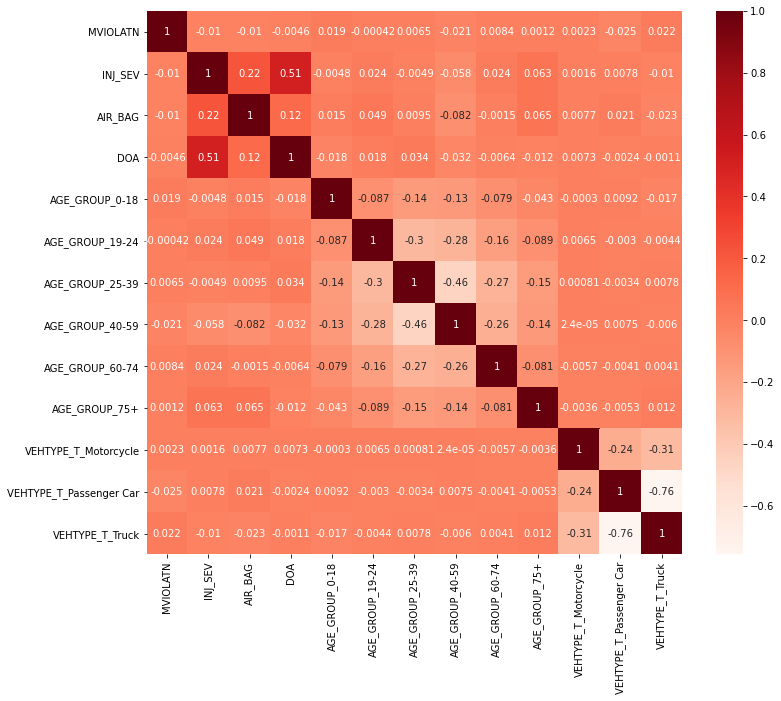

In [41]:
plt.figure(figsize=(12,10))
cor = newdata.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

THE GRAPHS SHOW THE CORRELATION BETWEEN GROUP OF AGES WITH DOA. AS WE CAN SEE THAT 
-GROUP 1 : HAS LOW POSIBILITY, SINCE THEY HAVE LESS DRIVERS BECAUSE OF DRIVER LICENSE RESTRICTION
-GROUP 2 : IN CREASE POSIBILITY THAT CAUSES FATALITY 
-GROUP 3 : WE CAN CONSIDER THEM AS EXPERIENCED DRIVER 
-GROUP 4 AND 5 INCREASE SIGNIFICANT IN POSIBILITY THAT CAUSE FATAL ACCIDENT SINCE THE AGE INCREASE

In [42]:
##SELECTING FEATURES AND TARGET and SPLIT INTO TRAINING AND TESTING DATASET
X = newdata.drop('DOA',1)
y=newdata['DOA']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.70, random_state = 100)

In [43]:
## SPLIT THE DATA INTO 2 DATA SET : TRAINING DATA AND TEST DATA


In [52]:
## IMPLEMENT RANDOMFORESTCLASSIFIER
## SINCE OUR TARGET VALUE IS CATEGORICAL SO WE SHOULD US RANDOMFORESTCLASSIFIER INSTEAD OF REGRESSOR
rf = RandomForestClassifier(n_estimators = 1000, random_state = 100, oob_score=True)


In [53]:
## FIT RANDOMFORESTCLASSIFIER INTO OUR TRAINING SET.
rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=100)

In [54]:
## USING TESTING FEATURES TO MAKE A PREDICTION AND THEN COMPARE WITH THE ACTUAL TARGET:
predict= rf.predict(X_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':predict})
df


,Actual,Predicted
8174,0,0
8309,0,0
9513,1,1
8700,1,1
7117,1,1
...,...,...
3955,1,1
6187,0,0
6862,1,0
9850,0,0


In [55]:
##TESTING THE ACCURACY OF MODEL BY COMPARING BETWEEN WHAT WE PREDICTED AND WHAT WE ACTUAL HAVE AS THE TABLE ABOVE:
print("THE ACCURACY OF THE MODEL:",metrics.accuracy_score(y_test,predict))

THE ACCURACY OF THE MODEL: 0.8418234442836469


Since we keep increasing test size, the score will improve better. 

In [56]:
print('Scorer:', rf.score(X_train,y_train))

Scorer: 0.8720027017899359


In [57]:
np.mean(cross_val_score(rf, X_train, y_train, cv=10))

0.8493800618800618

# 5/ Model Evaluation:

## 5A/ TESTDATA IS THE DATA I SLICED FROM THE BIG DATA FROM LINE CODE  IN 2033

In [2430]:
testdata

,MVIOLATN,SEX,INJ_SEV,AIR_BAG,DOA,AGE_GROUP_0-18,AGE_GROUP_19-24,AGE_GROUP_25-39,AGE_GROUP_40-59,AGE_GROUP_60-74,AGE_GROUP_75+,VEHTYPE_T_Motorcycle,VEHTYPE_T_Passenger Car,VEHTYPE_T_Truck
342,0,1,0,0,0,0,0,0,0,1,0,0,1,0
617,0,1,4,0,1,0,1,0,0,0,0,0,1,0
716,0,0,2,1,0,0,0,0,0,1,0,0,0,1
774,0,0,0,0,0,0,0,0,1,0,0,1,0,0
837,0,1,0,0,0,0,0,1,0,0,0,0,0,1
885,0,1,9,0,0,0,0,0,1,0,0,0,0,1
936,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1059,0,1,4,0,0,0,0,0,1,0,0,0,0,1
1673,0,1,4,0,1,0,0,0,1,0,0,0,1,0
4165,0,1,0,0,0,0,0,1,0,0,0,0,0,1


## 5B/ USING MODEL WE BUILD TO EXAMINATE THE TESTDATA TAKEN FROM THE BIG DATA 

In [2431]:
##DROP THE TARGET FEATURES SO WE CAN USE THE REST AS INPUT FOR OUR MODEL TO PRODUCE PREDICTION
newtestdata=testdata.drop(['DOA'],axis=1)

In [2432]:
predict= rf.predict(newtestdata)
predict

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

- AS THE TEST DATA PRODUCED IN LINE 2024 WE CAN SEE THE ARRAY OF TARGET.
      [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]
- CLEARLY OUR MODEL PREDICT 10 CORRECT OUT OF 11 AS COMPARE WITH THE ORIGINAL VALUE
- THE ACCURACY SCORE IS ALMOST 91%.
**THEREFORE, THE MODEL IS RELIABLE. 

## 5C/ I USED RANDOM FOREST CLASSIFIER TO PREDICT THE OUTCOME OF DATASET.

- RANDOMFOREST AND TREE DECISON ARE THE SIMILAR IN CONCEPT OF CLASSIFICATION. HOWEVER, THEY HAVE DIFFERENT IN PRODUCING THE RESULT THAT WE CAN MAKE DECISION ON. 
  * DECISION TREE GENERATE A SERIES OF SEQUENTIAL DECISIONS MADE TO REACH A SPECIFIL RRESULTS. 
  * RANDOM FOREST IS LIKE A COMBINATION OF DECISION TREES, SINCE WE HAVE MORE OUTPUT (DECISION TREES) WE CAN PRODUCE MORE EFFECTIVE RESULT. AND RANDOM FOREST. THE RESULTED WILL BE VOTED FROM EACH DECISION TREE AS MAJORITY
- ALSO RANDOM FOREST CLASSIFER PRODUCES FEATURES IMPORTANTS, IT HELPS US DECIDE WHICH MAIN FACTOR THAT COULD INFLUENCE THE DECISION.

###5D/ NOW WE LOOK AT THE IMPORTANT FEATURES:
THIS IS VERY IMPORTANT SINCE I WANT TO IDENTIFY THE MAIN INDICATOR SO I CAN BASE ON THAT TO MAKE DECISION. 
AS SOME OF MY PREVIOUS GRAPHS, I WANT TO COMPARE THE DRIVING BEHAVIOR BETWEEN GROUP OF AGE. THE RESULT SHOW US THAT
GROUP OF AGE FROM 60 AND  ABOVE HAVE HIGHER IMPORTANT SCORE, IT MEETS MY EXPECTATION.

In [2433]:
## LISTING IMPORTANT VARIABLES
VIF = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
### CREDIT THIS LINE OF CODE TO THIS WEBSITE: I AM ABLE TO PRINT OUT THE IMPORTANT FEATURES,
### BUT I CANNOT SORT IT AND LABELS IT. THUS I USE WESBITE TO REFERNECE TO MAKE MY RESULT EASY SEE.
### https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd

Variable: INJ_SEV              Importance: 0.816
Variable: MVIOLATN             Importance: 0.025
Variable: SEX                  Importance: 0.023
Variable: AGE_GROUP_75+        Importance: 0.021
Variable: AIR_BAG              Importance: 0.02
Variable: VEHTYPE_T_Truck      Importance: 0.018
Variable: AGE_GROUP_60-74      Importance: 0.016
Variable: VEHTYPE_T_Passenger Car Importance: 0.016
Variable: VEHTYPE_T_Motorcycle Importance: 0.014
Variable: AGE_GROUP_25-39      Importance: 0.009
Variable: AGE_GROUP_40-59      Importance: 0.008
Variable: AGE_GROUP_0-18       Importance: 0.007
Variable: AGE_GROUP_19-24      Importance: 0.007


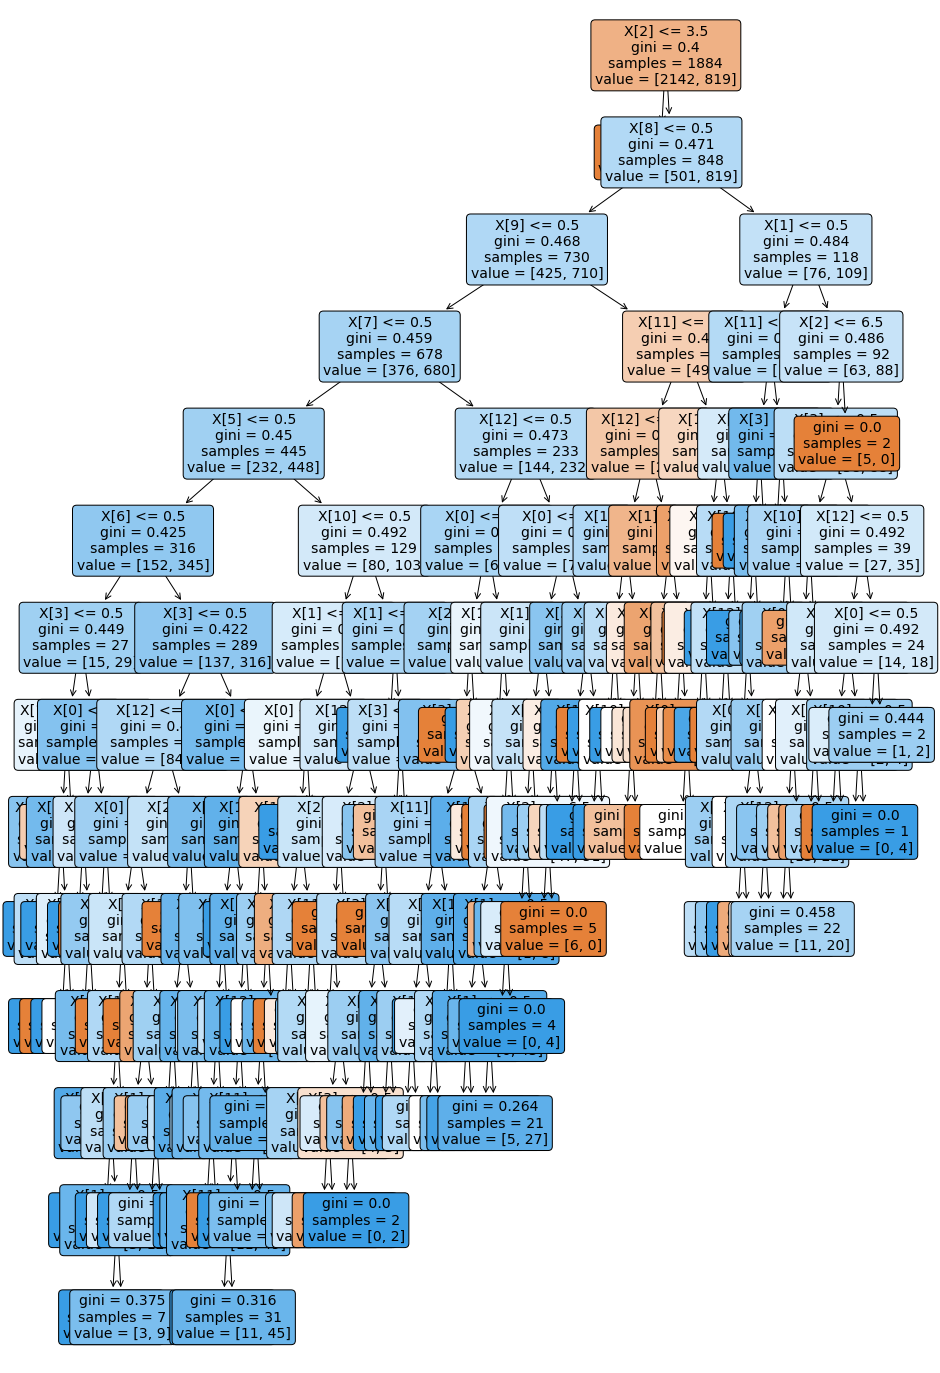

In [2434]:
##GRAPH THAT GENERATES FROM THE MODEL 

Tree = rf.estimators_[3]
#Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(15,25))
tree.plot_tree(Tree, filled=True, 
              rounded=True, 
              fontsize=14);

# 6: Model Serialization
## 6A/  THE PURPOSE OF SERIALIZATION
- TO HAVE A WAY TO PERSIST THE MODEL USE, SAVING THAT MODEL AND CAN REUSE IT ANY TIME.
- ALSO WE CAN USE THAT TO COMPARE WITH OTHER MODELS TO SEE THE DIFFERENT SO WE CAN IMPROVE OUR MODEL
- WE CAN USE THAT TO TEST NEW DATASET ON THE FUTURE. 



## 6B/ BUILDING SERIALIZATION USING "PICKLE"

In [2435]:
#IMPORT NECESSARY LIBRARY
import pickle
#SAVE THE MODEL WE BUILT:
filename ='modelLN.sav'
pickle.dump(rf,open(filename,'wb'))
#LOAD THE MODEL:
load=pickle.load(open(filename,'rb'))
predict= rf.predict(X_test) ##You can pass argument 
print(predict)

[0 0 1 ... 0 0 0]


## 6C/ COMPARISION BETWEEN PICKLE, ONNX AND PMML 4.4
- I WOULD LIKE TO PICK ONNX AS ALTERNATIVE FOR PICKLE SINCE, ONNX CAN HELP MY MODEL IMPLEMENTED ON DIFFERENT ENVIROMENT. FOR EXAMPE, MY MODEL IS BUILT IN PYTHON, BUT IT WOULD BE USED IN ACCROSS LIBRARIES AND LANGUAGES. 
MOST OF DEEP LEARNING SUPPORT IT.

- SOURCES: https://medium.com/analytics-and-data/overview-of-the-different-approaches-to-putting-machinelearning-ml-models-in-production-c699b34abf86